# Overview
Use this notebook to convert an OCT image you have to an H&E image in order to evaluate how the code works.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-UseModel/blob/main/ConvertOCTImagesToHistology.ipynb) and run.

## Notebook's Inputs:

In [1]:
oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/2020-11-10 10x Raw Data Used In Paper (Paper V2)/LG-19 - Slide04_Section02 (Fig 3.c)/OCTAligned.tiff"

In [2]:
if not 'setup_env_oct2Hist_usemodel' in globals():
  !git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-UseModel
  %run /content/OCT2Hist-UseModel/setup_env.ipynb
  setup_env_oct2Hist_usemodel = True
from utils.show_images import *
from utils.crop import crop
from utils.masking import mask_image

Cloning into 'OCT2Hist-UseModel'...
remote: Enumerating objects: 264, done.
remote: Counting objects: 100% (108/108), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 264 (delta 67), reused 55 (delta 15), pack-reused 156
Receiving objects: 100% (264/264), 8.71 MiB | 18.17 MiB/s, done.
Resolving deltas: 100% (146/146), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-UseModel/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2513, done.        
remote: Total 2513 (delta 0), reused 0 (delta 0), pack-reused 2513        
Receiving objects: 100% (2513/2513), 8.20 MiB | 27.33 MiB/s, done.
Resolving deltas: 100% (1575/1575), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
Mounted at /content/drive/
/content/OCT2Hist-UseModel
Drive already mounted at /content/drive/;

## Virtual oct2hist inputs (constants):

In [3]:
#how many microns per pixel for each axis
microns_per_pixel_z = 1
microns_per_pixel_x = 1

#pix2pix input sizes
VIRTUAL_HIST_WIDTH = 256
VIRTUAL_HIST_HEIGHT = 256
#verify input sizes
MICRONS_PER_PIXEL_Z_TARGET = 2
MICRONS_PER_PIXEL_X_TARGET = 4

## Preprocess
Mask images, crop and convert to the right size

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load OCT image
oct_image_orig = cv2.imread(oct_input_image_path)
oct_image_orig = cv2.cvtColor(oct_image_orig, cv2.COLOR_BGR2RGB)
oct_image = oct_image_orig.copy()


In [5]:
#calculate the new image size to according to source and target micron/pixel rate.
new_image_width = int(oct_image.shape[1] * microns_per_pixel_x / MICRONS_PER_PIXEL_X_TARGET)
new_image_height = int(oct_image.shape[0] * microns_per_pixel_z / MICRONS_PER_PIXEL_Z_TARGET)

In [6]:
masked_image, filt_img = mask_image(oct_image)

##visualize user input next to processed input

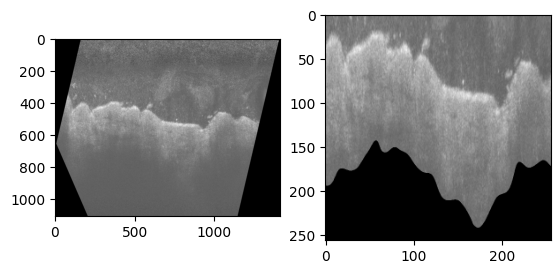

In [7]:
from utils.crop import crop
cropped = crop(masked_image)
o2h_input = cv2.resize(cropped, [VIRTUAL_HIST_WIDTH,VIRTUAL_HIST_HEIGHT] , interpolation=cv2.INTER_AREA)
showTwoImgs(oct_image_orig, o2h_input)

## Run Model

In [8]:
histology_image = pix2pix.run_network(o2h_input)

## Show results

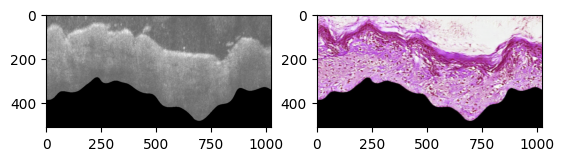

In [9]:
#visualize
height,width = cropped.shape[:2]
histology_image_resized = cv2.resize(histology_image, [width,height] , interpolation=cv2.INTER_AREA)
showTwoImgs(cropped, histology_image_resized)